### Objective


#### The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables

### Data Set Description

#### The file solarpowergeneration.csv contains the data for this example. Here, the number of variables (columns) is 10, and the number of instances (rows) is 2920. We have the following variables for this analysis:

#### •	distance_to_solar_noon, in radians.

#### •	temperature, daily average temperature, in degrees Celsius.

#### •	wind_direction, daily average wind direction, in degrees (0-360).

#### •	wind_speed, daily average wind speed, in meters per second

#### •	sky_cover, on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.

#### •	visibility, in kilometers.

#### •	humidity, in percentage.

#### •	average_wind_speed, average wind speed during the 3 hours de measure was taken in meters per second.

#### •	average_pressure, average barometric pressure during the 3 hours the measure was taken in, in mercury inches.

#### •	power_generated(Target), in Jules for each 3 hours

In [160]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [161]:
power = pd.read_csv("solarpowergeneration.csv", na_values = ["!", "@","#","$","%","^","&","*"])
power

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [162]:
power.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

In [163]:
power = power.astype({"sky-cover" : "category"})
power.dtypes

distance-to-solar-noon          float64
temperature                       int64
wind-direction                    int64
wind-speed                      float64
sky-cover                      category
visibility                      float64
humidity                          int64
average-wind-speed-(period)     float64
average-pressure-(period)       float64
power-generated                   int64
dtype: object

In [164]:
power.dtypes

distance-to-solar-noon          float64
temperature                       int64
wind-direction                    int64
wind-speed                      float64
sky-cover                      category
visibility                      float64
humidity                          int64
average-wind-speed-(period)     float64
average-pressure-(period)       float64
power-generated                   int64
dtype: object

In [165]:
power.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [166]:
power.duplicated().sum()

0

In [167]:
power.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,10.000000,100.000000,40.000000,30.530000,36580.000000


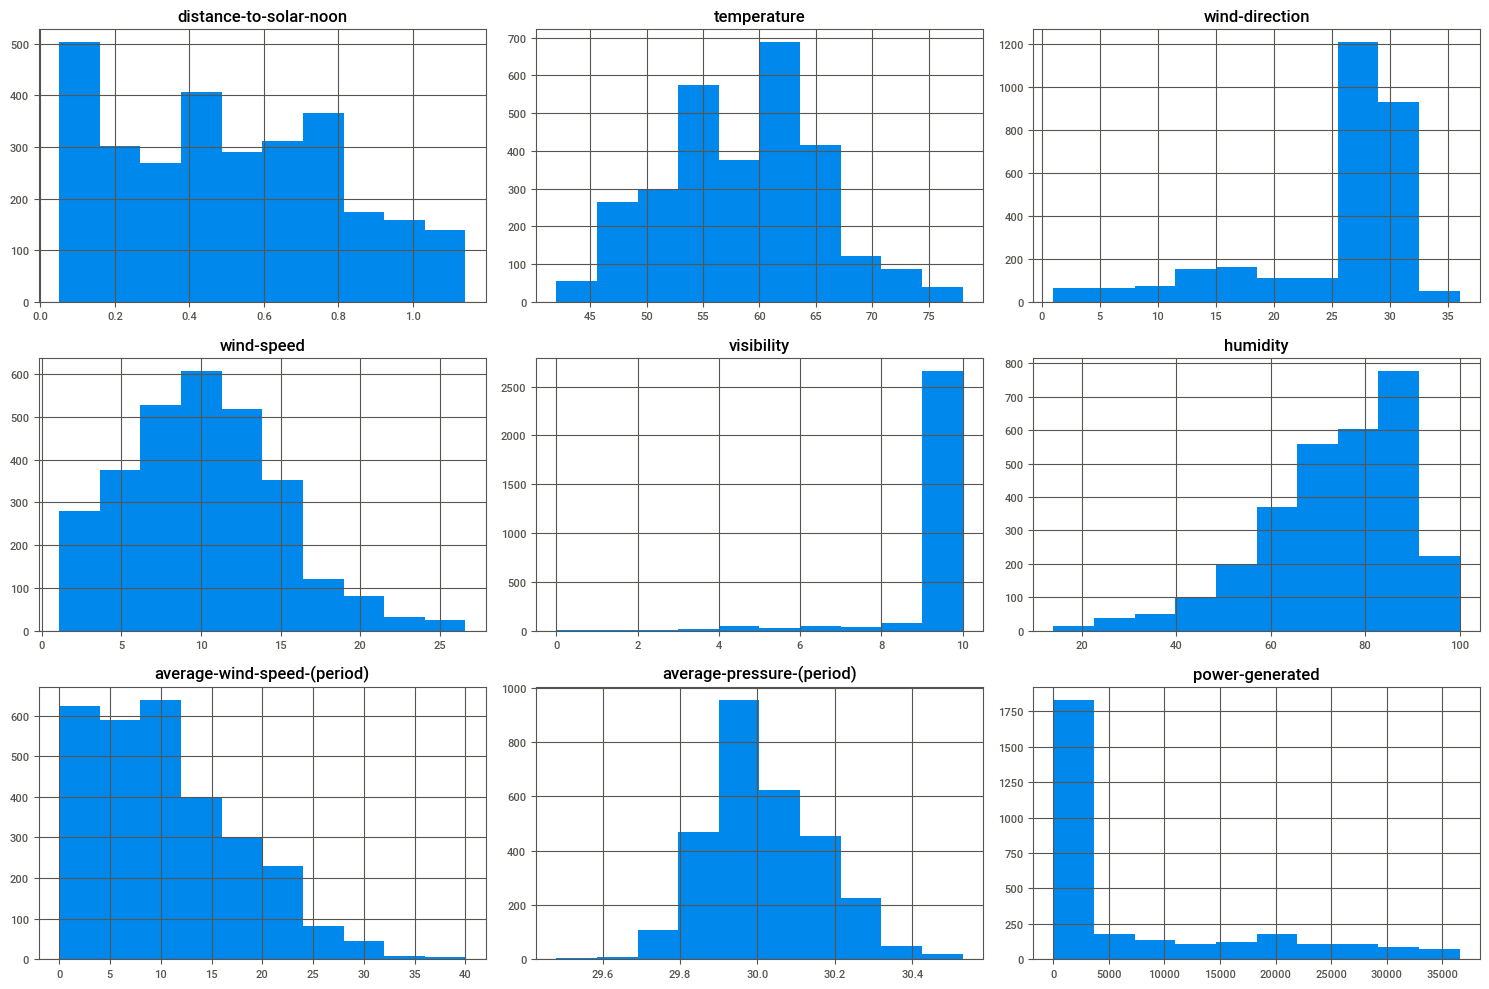

In [168]:
# Histograms
power.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [169]:
power.corr()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145207,-0.118010,-0.145073,0.065807,0.368964,-0.214891,0.082505,-0.746681
temperature,-0.145207,1.000000,0.342146,0.096267,0.194110,-0.221463,0.054546,-0.435723,0.132193
wind-direction,-0.118010,0.342146,1.000000,0.341529,0.203445,-0.095917,0.229844,-0.272405,0.146788
wind-speed,-0.145073,0.096267,0.341529,1.000000,0.184778,0.004901,0.673626,-0.379752,0.142641
visibility,0.065807,0.194110,0.203445,0.184778,1.000000,-0.291320,0.143621,-0.105345,0.076536
humidity,0.368964,-0.221463,-0.095917,0.004901,-0.291320,1.000000,-0.218042,0.018489,-0.522545
average-wind-speed-(period),-0.214891,0.054546,0.229844,0.673626,0.143621,-0.218042,1.000000,-0.293457,0.278174
average-pressure-(period),0.082505,-0.435723,-0.272405,-0.379752,-0.105345,0.018489,-0.293457,1.000000,-0.036771
power-generated,-0.746681,0.132193,0.146788,0.142641,0.076536,-0.522545,0.278174,-0.036771,1.000000


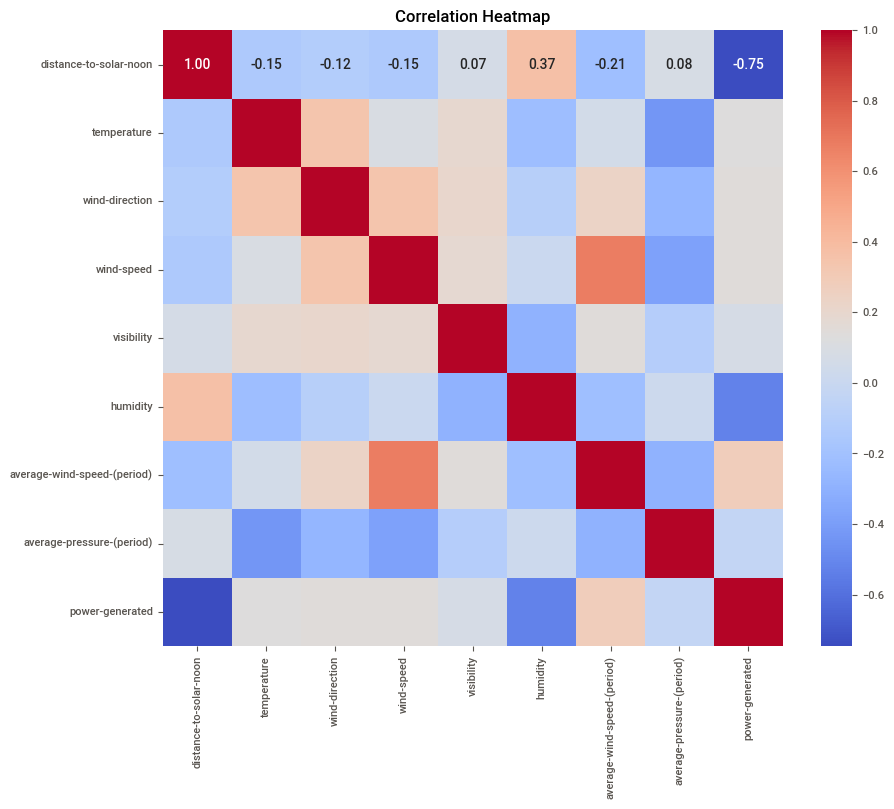

In [194]:
# Calculate the correlation matrix
correlation_matrix = power.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add labels and title
plt.title("Correlation Heatmap")
plt.show()

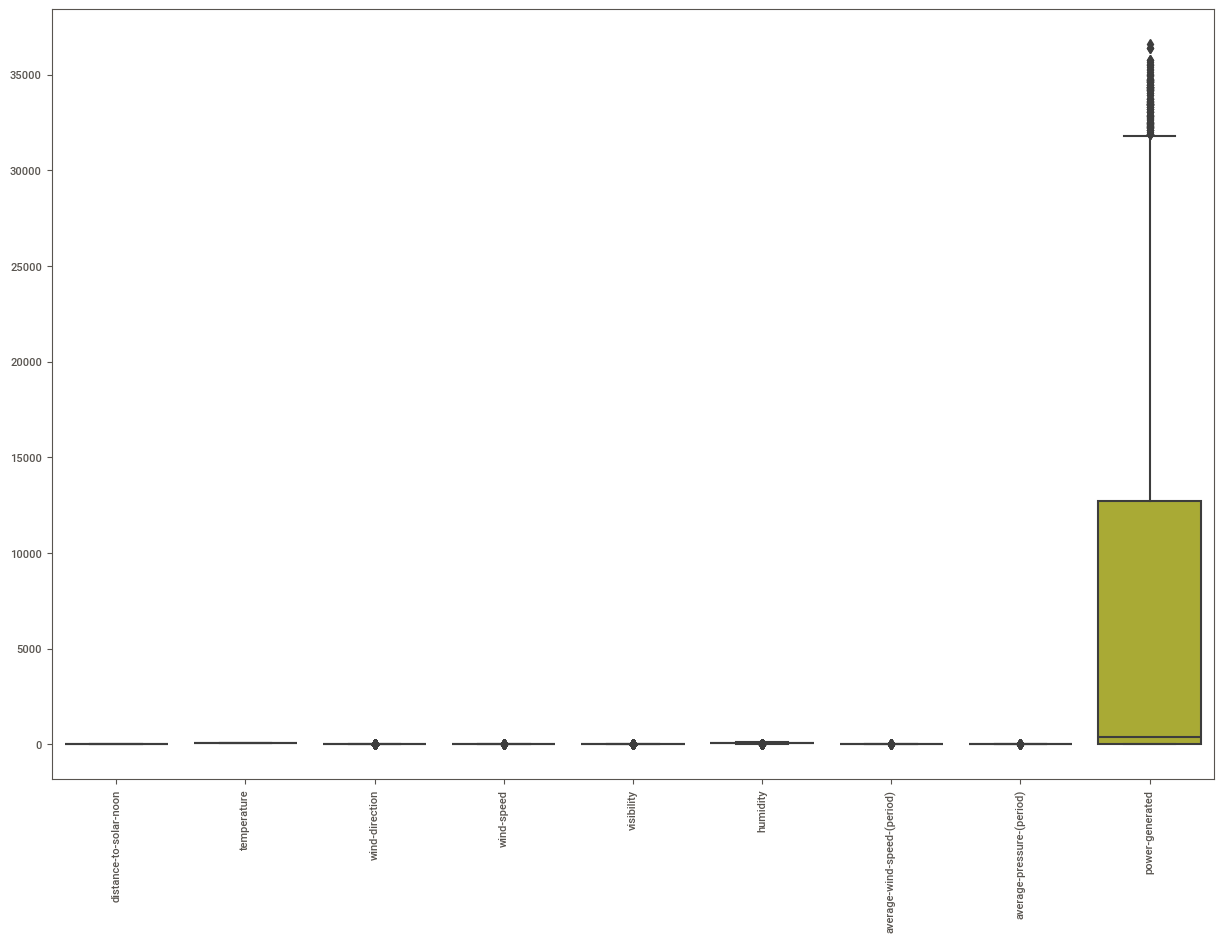

In [171]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=power)
plt.xticks(rotation=90)
plt.show()

In [172]:
# Step 1: Select numerical columns
numerical_columns = power.select_dtypes(include=["float64", "int64"]).columns

# Initialize a dictionary to store outliers count for each column
outliers_dict = {}

# Step 2: Loop through each numerical column
for col in numerical_columns:
    # Calculate Q1 and Q3 for each column
    Q1 = np.percentile(power[col], 25)
    Q3 = np.percentile(power[col], 75)

    # Step 3: Compute the IQR for each column
    IQR = Q3 - Q1

    # Step 4: Determine the outlier boundaries for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 5: Identify outliers
    outliers = power[(power[col] < lower_bound) | (power[col] > upper_bound)]

    # Step 6: Count the number of outliers in the column
    outliers_count = len(outliers)

    # Store the outliers count in the dictionary
    outliers_dict[col] = outliers_count

    # Print the results for each column
    print(f"Column: {col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers Count: {outliers_count}")
    print("-" * 50)

# Calculate the sum of outliers across all numerical columns
total_outliers = sum(outliers_dict.values())
print(f"Total Outliers across all columns: {total_outliers}")


Column: distance-to-solar-noon
Q1: 0.24371397625
Q3: 0.739527509
IQR: 0.49581353274999995
Lower Bound: -0.5000063228749999
Upper Bound: 1.4832478081249998
Outliers Count: 0
--------------------------------------------------
Column: temperature
Q1: 53.0
Q3: 63.0
IQR: 10.0
Lower Bound: 38.0
Upper Bound: 78.0
Outliers Count: 0
--------------------------------------------------
Column: wind-direction
Q1: 25.0
Q3: 29.0
IQR: 4.0
Lower Bound: 19.0
Upper Bound: 35.0
Outliers Count: 528
--------------------------------------------------
Column: wind-speed
Q1: 6.6
Q3: 13.1
IQR: 6.5
Lower Bound: -3.1500000000000004
Upper Bound: 22.85
Outliers Count: 40
--------------------------------------------------
Column: visibility
Q1: 10.0
Q3: 10.0
IQR: 0.0
Lower Bound: 10.0
Upper Bound: 10.0
Outliers Count: 429
--------------------------------------------------
Column: humidity
Q1: 65.0
Q3: 84.0
IQR: 19.0
Lower Bound: 36.5
Upper Bound: 112.5
Outliers Count: 83
---------------------------------------------

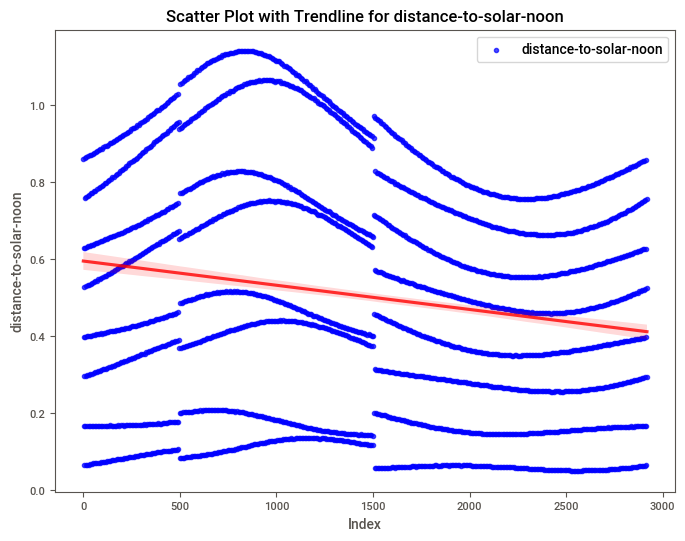

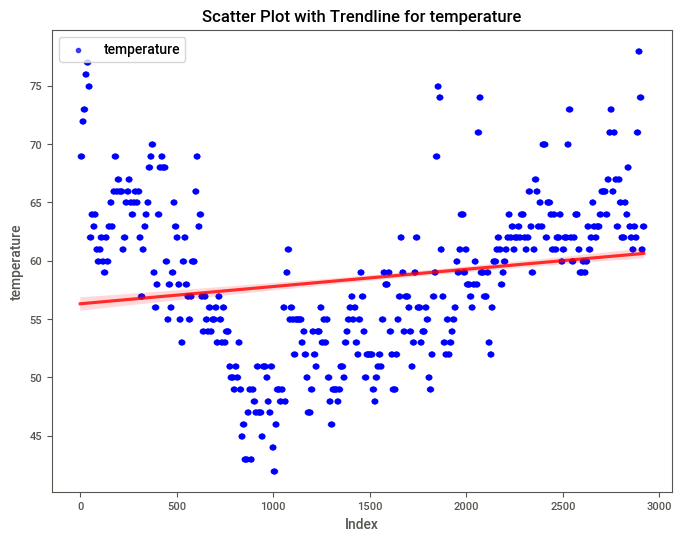

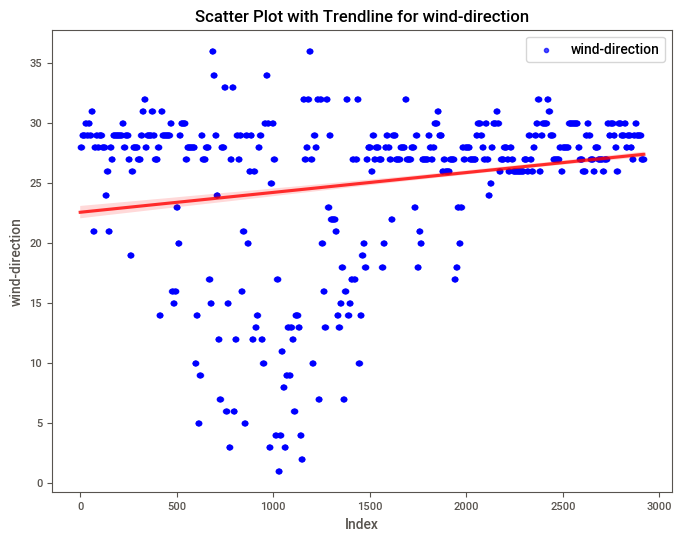

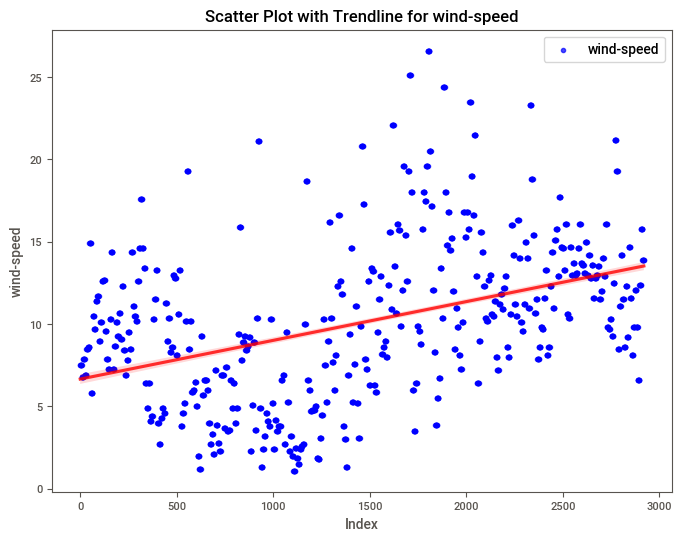

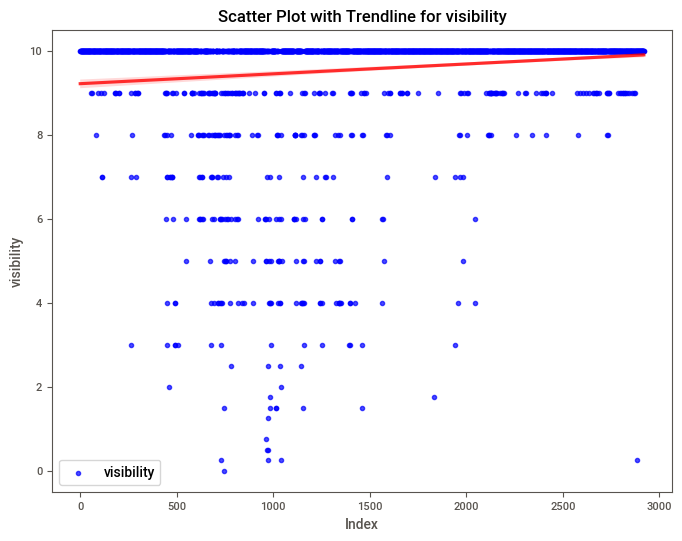

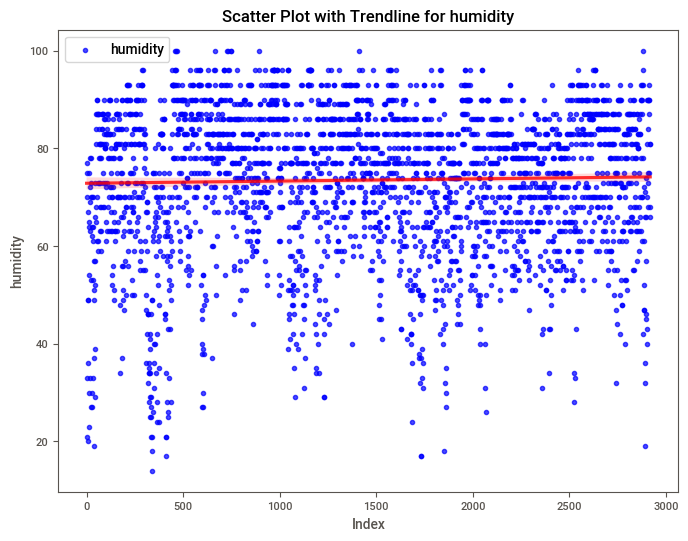

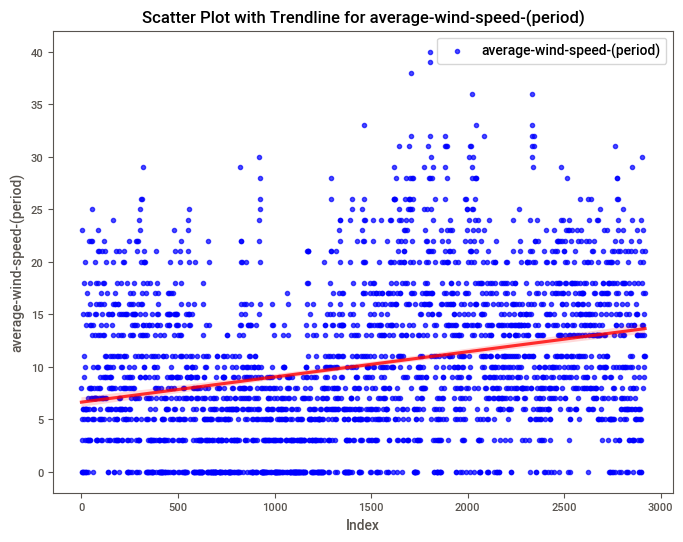

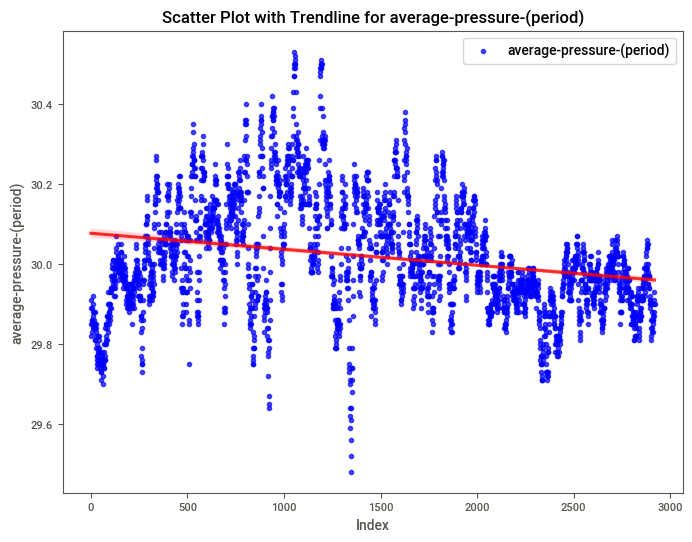

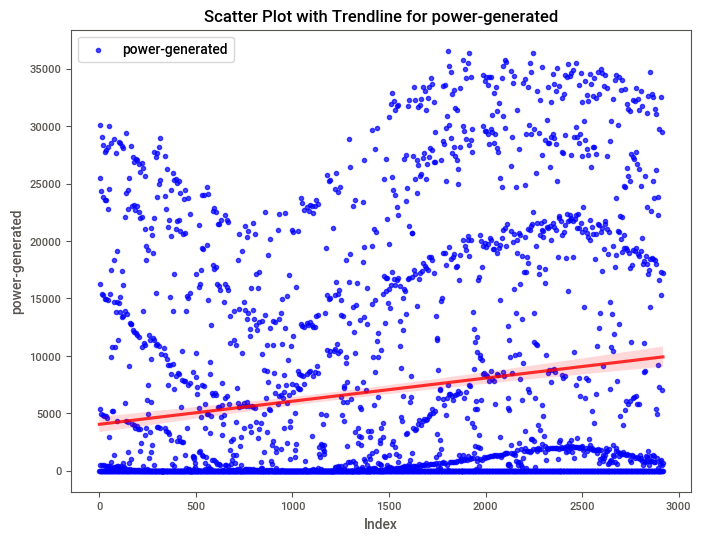

In [173]:
# Step 1: Select numerical columns
numerical_columns = power.select_dtypes(include=["float64", "int64"]).columns

# Step 2: Loop through each numerical column
for col in numerical_columns:
    # Step 3: Plot the scatter plot with a trendline for each numerical column
    plt.figure(figsize=(8, 6))
    
    # Use sns.regplot() for scatter plot with a regression line (trendline)
    sns.regplot(x=power.index, y=power[col], label=col, color='blue', scatter_kws={'alpha':0.7}, line_kws={'color': 'red', 'alpha': 0.8})
    
    # Add plot title and labels
    plt.title(f"Scatter Plot with Trendline for {col}")
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    
    # Show the plot
    plt.show()

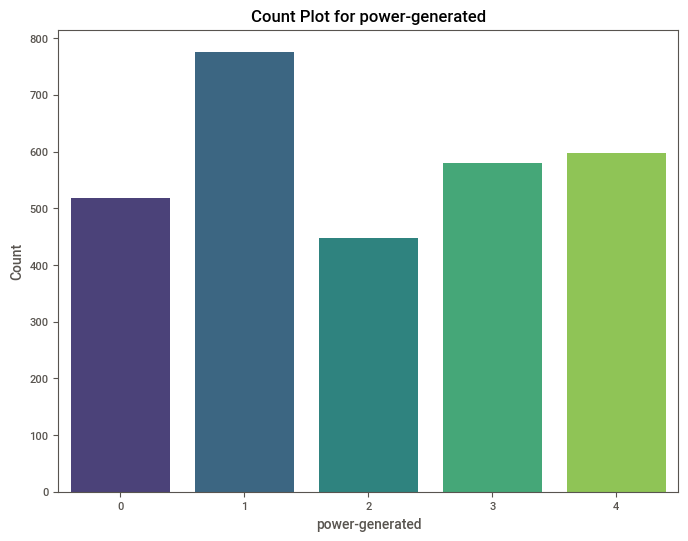

In [174]:
# Step 1: Select categorical columns (assuming you want to count plot categorical columns)
categorical_columns = power["sky-cover"]

plt.figure(figsize=(8, 6))
    
sns.countplot(data=power, x=categorical_columns, palette='viridis')  # You can change the color palette as needed

# Add plot title and labels
plt.title(f"Count Plot for {col}")
plt.xlabel(col)
plt.ylabel('Count')
    
# Show the plot
plt.show()

In [175]:
power.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [176]:
cat_cols = ["sky-cover"]
num_cols = ["distance-to-solar-noon", "temperature","wind-direction","wind-speed","visibility","humidity","average-wind-speed-(period)","average-pressure-(period)"]

In [177]:
X = power.drop(["power-generated"], axis = 1)
y = power["power-generated"]

In [178]:
X

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89
...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87


In [179]:
pd.DataFrame(y)

,power-generated
0,0
1,0
2,5418
3,25477
4,30069
...,...
2915,6995
2916,29490
2917,17257
2918,677


In [180]:
# splittig the data into TRAIN and VALIDATION data on X_dummies and y data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=107)

In [181]:
# printing the shape of X_train, y_train, X_test, Y_test
print('X Train Size:', (X_train.shape))
print('Y Train Size:', (y_train.shape))
print('X Test  Size:', (X_test.shape))
print('Y Test Size:', (y_test.shape))

X Train Size: (2044, 9)
Y Train Size: (2044,)
X Test  Size: (876, 9)
Y Test Size: (876,)


In [182]:
from sklearn.impute import SimpleImputer
num_cols_imputer=SimpleImputer(strategy='median')
num_cols_imputer = num_cols_imputer.fit(X_train[num_cols])
X_train[num_cols] = num_cols_imputer.transform(X_train[num_cols])
X_test[num_cols] = num_cols_imputer.transform(X_test[num_cols])

In [183]:
X_train.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
dtype: int64

In [184]:
X_test.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
dtype: int64

In [185]:
X_train_dummies = pd.get_dummies(X_train[cat_cols],drop_first = True)
X_train_dummies

,sky-cover_1,sky-cover_2,sky-cover_3,sky-cover_4
1010,0,0,0,1
2355,0,0,0,0
1995,0,0,0,0
2637,1,0,0,0
346,0,0,0,0
...,...,...,...,...
1518,0,0,0,0
2702,1,0,0,0
454,0,0,1,0
473,0,0,1,0


In [186]:
X_test_dummies = pd.get_dummies(X_test[cat_cols],drop_first = True)
X_test_dummies

,sky-cover_1,sky-cover_2,sky-cover_3,sky-cover_4
1641,1,0,0,0
2105,0,0,1,0
1673,0,0,0,1
2425,0,0,0,1
247,0,0,1,0
...,...,...,...,...
2590,0,0,1,0
1257,0,0,0,1
387,0,1,0,0
2695,0,0,0,1


In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_train[num_cols])
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns = X_train[num_cols].columns)
X_test_std = pd.DataFrame(scaler.transform(X_test[num_cols]), columns = X_test[num_cols].columns)

In [188]:
X_train_std

,distance-to-solar-noon,temperature,wind-direction,wind-speed,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
0,-0.215723,-1.821700,-3.011328,-1.218362,0.318895,-0.356927,-1.397700,1.278676
1,-1.190018,1.279294,0.594335,0.111288,0.318895,-0.225876,-0.712001,-1.324735
2,-1.186659,0.393295,0.450108,1.052271,0.318895,-1.274281,0.522259,0.082514
3,-0.810860,0.393295,0.594335,0.827253,0.318895,-0.094826,2.167938,-0.972923
4,-0.222058,0.983961,0.594335,-1.075169,0.318895,0.101750,-1.397700,1.137951
...,...,...,...,...,...,...,...,...
2039,0.213877,-1.378701,0.594335,0.622692,0.318895,-0.684553,0.796539,0.786139
2040,-0.078361,1.131627,0.305882,0.377218,0.318895,-0.029300,1.070819,-0.339661
2041,0.519516,-0.492703,0.594335,-0.236467,0.318895,1.281206,0.659399,0.997226
2042,0.785991,0.097963,-1.280610,-0.318291,0.318895,1.084630,-0.712001,-1.043286


In [189]:
X_test_std

,distance-to-solar-noon,temperature,wind-direction,wind-speed,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
0,0.546240,-0.492703,0.305882,1.215920,0.318895,1.019104,-0.986280,0.926864
1,0.190019,0.097963,0.305882,0.009007,0.318895,0.625953,-1.397700,-0.902561
2,0.510576,-0.640369,0.450108,1.931886,0.318895,1.281206,1.756519,-0.832198
3,0.179908,0.983961,0.882788,-0.318291,0.318895,0.101750,-0.712001,-1.395098
4,1.157053,1.131627,0.594335,-0.481941,0.318895,0.691478,-0.163441,-0.480386
...,...,...,...,...,...,...,...,...
871,-0.121290,0.097963,0.305882,1.215920,0.318895,0.888054,0.933679,-0.410023
872,0.675020,-0.492703,-1.280610,0.029463,0.318895,1.084630,-0.300581,-0.761836
873,-1.108570,-0.345037,0.305882,0.274937,0.318895,-0.094826,-0.300581,0.575051
874,0.632938,0.836295,0.305882,0.274937,0.318895,0.888054,0.933679,-0.198936


In [193]:
X_train_dummies = X_train_dummies.reset_index()
X_train_dummies

,index,sky-cover_1,sky-cover_2,sky-cover_3,sky-cover_4
0,1010,0,0,0,1
1,2355,0,0,0,0
2,1995,0,0,0,0
3,2637,1,0,0,0
4,346,0,0,0,0
...,...,...,...,...,...
2039,1518,0,0,0,0
2040,2702,1,0,0,0
2041,454,0,0,1,0
2042,473,0,0,1,0


In [191]:
final_X_train = pd.concat([X_train_dummies, X_train_std], axis = 1)
final_X_train

,sky-cover_1,sky-cover_2,sky-cover_3,sky-cover_4,distance-to-solar-noon,temperature,wind-direction,wind-speed,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
1010,0.0,0.0,0.0,1.0,-0.993039,-0.492703,1.603920,-1.402468,-1.843033,0.101750,-1.397700,-0.058211
2355,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,0.0,0.0,0.0,0.0,1.335979,0.540962,0.450108,-0.052361,-0.401748,0.822528,0.110839,-0.269298
2637,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,0.0,0.0,0.0,0.0,-0.590403,1.574626,0.594335,-0.297835,0.318895,-2.388211,1.482239,-0.832198
...,...,...,...,...,...,...,...,...,...,...,...,...
2025,NaN,NaN,NaN,NaN,1.682197,-0.492703,1.603920,-1.402468,-0.401748,0.232801,-1.397700,-0.058211
2026,NaN,NaN,NaN,NaN,-1.490164,-0.640369,0.305882,1.113639,0.318895,0.101750,1.345099,-0.550748
2034,NaN,NaN,NaN,NaN,-0.156999,-1.231035,0.450108,1.747780,0.318895,-0.094826,1.482239,-0.198936
2037,NaN,NaN,NaN,NaN,1.467022,0.983961,0.450108,0.193113,0.318895,0.494902,0.659399,-0.410023
